# Part 1 - Import Libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Project 3/Mineral Resource Management/Mines_and_Mineral_Resources.csv")  # Replace "mineral_resource_dataset.csv" with your dataset filename


# Part 2 - Determine Number of Clusters

In [ ]:
# Selecting longitude and latitude features
X = data[['X', 'Y']]

In [ ]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

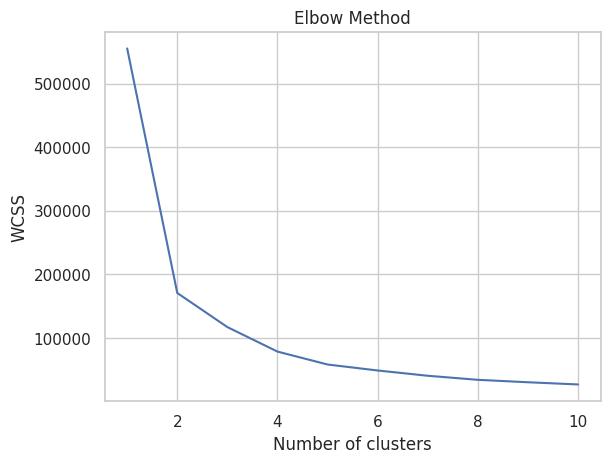

In [ ]:
# Plotting the Elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Based on the Elbow method, choose the optimal number of clusters and fit the K-Means model
optimal_num_clusters = 3  # Update with the optimal number of clusters determined from the Elbow method
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Part 3 - Visualize Result

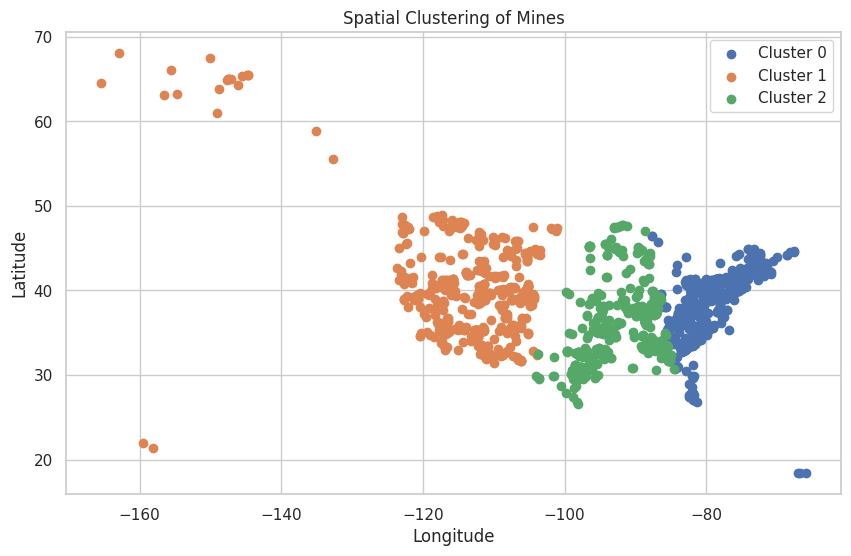

In [ ]:
# Visualize the clusters on a map
plt.figure(figsize=(10, 6))
for cluster in range(optimal_num_clusters):
    plt.scatter(data[data['Cluster'] == cluster]['X'], data[data['Cluster'] == cluster]['Y'], label=f'Cluster {cluster}')
plt.title('Spatial Clustering of Mines')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Part 4 - Evaluate Model

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
silhouette = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette}")

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: 0.5492852921201162
Davies-Bouldin Index: 0.7302995736547407
